# INF 721 : Projet Kit Start Data

##### Auteur : Hugo Michel MS BGD

## Analyse de données du vendée globe 

### Partie Web Scrapping

A partir d'une page web contenant des fiches techniques de chaque bateaux, on les données contenus sur cette page pour en extraire des caractéristiques techniques propres à chaque voiliers

### Etape 1 : Importation des libraries

In [1]:
import re
import requests
from bs4 import BeautifulSoup
import numpy as np

### Etape 2 : Web Scrapping

https://www.vendeeglobe.org/fr/glossaire

In [2]:
URL_PAGE = "https://www.vendeeglobe.org/fr/glossaire"

def get_carac_boat(url):
    
    request = requests.get(url)
    
    # On crée l'objet bs4 
    soup = BeautifulSoup(request.content)
    
    # On initialise le dictionnaire "boats"
    boats = {}
    
    soup2 = soup.findAll('div', attrs = {'class': f'boats-list__popup mfp-hide'})
    
    for div in soup2:
        
        sub_dic_boats = {}
        
        soup3 = div.find('div', attrs = {'class': f'boats-list__popup-infos'})
        
        # On récupère le nom du bateau
        title_boat = soup3.find('h3').text
        boats[title_boat] = sub_dic_boats
        
        # On récupère le nom du skipper
        skipper_name = soup3.find('a').attrs['href'].split("/")[-1]
        sub_dic_boats["Skipper"] = skipper_name.replace("-", " ")
        
        # On récupère toutes les caractéristiques du bateau
        
        soup4 = div.find('ul', attrs = {'class': 'boats-list__popup-specs-list'}).findAll('li')
        
        id_boat = soup4[0].text.split(":")[1].strip()
        
        list_special_boat = ["FRA 79", "08", "FRA 85", "JPN 11", "4", "2", "FRA 6", "GBR 99"]
        linkedout_boat = "Verdier"
        corum_lepargne = "FRA 6"
        
        if id_boat == linkedout_boat:
            
            sub_dic_boats["Numéro de voile"] = "FRA 59"
            
            sub_dic_boats["Anciens noms du bateau"] = np.nan

            sub_dic_boats["Architecte"] = soup4[0].text.split(":")[1].strip()

            sub_dic_boats["Chantier"] = soup4[1].text.split(":")[1].strip()

            sub_dic_boats["Date de lancement"] = soup4[2].text.split(":")[1].strip()

            sub_dic_boats["Longueur"] = soup4[3].text.split(":")[1].strip()

            sub_dic_boats["Largeur"] = soup4[4].text.split(":")[1].strip()

            sub_dic_boats["Tirant d'eau"] = soup4[5].text.split(":")[1].strip()

            sub_dic_boats["Déplacement (poids)"] = soup4[6].text.split(":")[1].strip()

            sub_dic_boats["Nombre de dérives"] = soup4[7].text.split(":")[1].strip()

            sub_dic_boats["Hauteur mât"] = soup4[8].text.split(":")[1].strip()

            sub_dic_boats["Voile quille"] = soup4[9].text.split(":")[1].strip()
            
            sub_dic_boats["Surface de voiles au près"] = soup4[10].text.split(":")[1].strip()

            sub_dic_boats["Surface de voiles au portant"] = soup4[11].text.split(":")[1].strip()
            
        if id_boat == corum_lepargne:
            
            sub_dic_boats["Numéro de voile"] = soup4[0].text.split(":")[1].strip()
            
            sub_dic_boats["Anciens noms du bateau"] = np.nan

            sub_dic_boats["Architecte"] = soup4[1].text.split(":")[1].strip()

            sub_dic_boats["Chantier"] = soup4[2].text.split(":")[1].strip()

            sub_dic_boats["Date de lancement"] = soup4[3].text.split(":")[1].strip()

            sub_dic_boats["Longueur"] = soup4[4].text.split(":")[1].strip()

            sub_dic_boats["Largeur"] = soup4[5].text.split(":")[1].strip()

            sub_dic_boats["Tirant d'eau"] = soup4[6].text.split(":")[1].strip()

            sub_dic_boats["Déplacement (poids)"] = soup4[7].text.split(":")[1].strip()

            sub_dic_boats["Nombre de dérives"] = soup4[8].text.split(":")[1].strip()

            sub_dic_boats["Hauteur mât"] = soup4[9].text.split(":")[1].strip()
            
            sub_dic_boats["Voile quille"] = np.nan
            
            sub_dic_boats["Surface de voiles au près"] = soup4[10].text.split(":")[1].strip()

            sub_dic_boats["Surface de voiles au portant"] = soup4[11].text.split(":")[1].strip()

        if id_boat not in list_special_boat and id_boat != linkedout_boat and id_boat != corum_lepargne:
        
            sub_dic_boats["Numéro de voile"] = soup4[0].text.split(":")[1].strip()

            sub_dic_boats["Anciens noms du bateau"] = soup4[1].text.split(":")[1].strip()

            sub_dic_boats["Architecte"] = soup4[2].text.split(":")[1].strip()

            sub_dic_boats["Chantier"] = soup4[3].text.split(":")[1].strip()

            sub_dic_boats["Date de lancement"] = soup4[4].text.split(":")[1].strip()

            sub_dic_boats["Longueur"] = soup4[5].text.split(":")[1].strip()

            sub_dic_boats["Largeur"] = soup4[6].text.split(":")[1].strip()

            sub_dic_boats["Tirant d'eau"] = soup4[7].text.split(":")[1].strip()

            sub_dic_boats["Déplacement (poids)"] = soup4[8].text.split(":")[1].strip()

            sub_dic_boats["Nombre de dérives"] = soup4[9].text.split(":")[1].strip()

            sub_dic_boats["Hauteur mât"] = soup4[10].text.split(":")[1].strip()

            sub_dic_boats["Voile quille"] = soup4[11].text.split(":")[1].strip()

            sub_dic_boats["Surface de voiles au près"] = soup4[12].text.split(":")[1].strip()

            sub_dic_boats["Surface de voiles au portant"] = soup4[13].text.split(":")[1].strip()
            
        if id_boat in list_special_boat and id_boat != linkedout_boat and id_boat != corum_lepargne:
            
            sub_dic_boats["Numéro de voile"] = soup4[0].text.split(":")[1].strip()
            
            sub_dic_boats["Anciens noms du bateau"] = np.nan

            sub_dic_boats["Architecte"] = soup4[1].text.split(":")[1].strip()

            sub_dic_boats["Chantier"] = soup4[2].text.split(":")[1].strip()

            sub_dic_boats["Date de lancement"] = soup4[3].text.split(":")[1].strip()

            sub_dic_boats["Longueur"] = soup4[4].text.split(":")[1].strip()

            sub_dic_boats["Largeur"] = soup4[5].text.split(":")[1].strip()

            sub_dic_boats["Tirant d'eau"] = soup4[6].text.split(":")[1].strip()

            sub_dic_boats["Déplacement (poids)"] = soup4[7].text.split(":")[1].strip()

            sub_dic_boats["Nombre de dérives"] = soup4[8].text.split(":")[1].strip()

            sub_dic_boats["Hauteur mât"] = soup4[9].text.split(":")[1].strip()

            sub_dic_boats["Voile quille"] = soup4[10].text.split(":")[1].strip()

            sub_dic_boats["Surface de voiles au près"] = soup4[11].text.split(":")[1].strip()

            sub_dic_boats["Surface de voiles au portant"] = soup4[12].text.split(":")[1].strip()


    return boats
    
boats_dict = get_carac_boat(URL_PAGE)

#### On visualise le dictionnaire contenant les informations techniques de chaque bâteau

In [3]:
boats_dict

{'NEWREST - ART & FENÊTRES': {'Skipper': 'fabrice amedeo',
  'Numéro de voile': 'FRA 56',
  'Anciens noms du bateau': 'No Way Back, Vento di Sardegna',
  'Architecte': 'VPLP/Verdier',
  'Chantier': 'Persico Marine',
  'Date de lancement': '01 Août 2015',
  'Longueur': '18,28 m',
  'Largeur': '5,85 m',
  "Tirant d'eau": '4,50 m',
  'Déplacement (poids)': '7 t',
  'Nombre de dérives': 'foils',
  'Hauteur mât': '29 m',
  'Voile quille': 'monotype',
  'Surface de voiles au près': '320 m2',
  'Surface de voiles au portant': '570 m2'},
 'PURE - Best Western®': {'Skipper': 'romain attanasio',
  'Numéro de voile': 'FRA 49',
  'Anciens noms du bateau': 'Gitana Eighty, Synerciel, Newrest-Matmut',
  'Architecte': 'Bruce Farr Design',
  'Chantier': 'Southern Ocean Marine (Nouvelle Zélande)',
  'Date de lancement': '08 Mars 2007',
  'Longueur': '18,28m',
  'Largeur': '5,80m',
  "Tirant d'eau": '4,50m',
  'Déplacement (poids)': '9t',
  'Nombre de dérives': '2',
  'Hauteur mât': '28m',
  'Voile quill

#### On transforme le dictionnaire en format DataFrame et on renomme l'index qui correspond au nom des bâteaux

In [4]:
import pandas as pd

boats_dataframe = pd.DataFrame(boats_dict)
boats_dataframe.index.names = ["Nom Bateau"]

### Etape 3 : Nettoyage du dataframe

#### On renomme le nom de colonnes

In [5]:
boats_dataframe_renamed = boats_dataframe.T.rename({"Nom Bateau": "Nom_Bateau",
                                                  "Numéro de voile": "Numero_voile",
                                                  "Anciens noms du bateau": "Anciens_noms_bateau",
                                                  "Date de lancement": "Date_lancement",
                                                  "Longueur": "Longueur_m",
                                                  "Largeur": "Largeur_m",
                                                  "Tirant d'eau": "Tirant_eau_m",
                                                  "Déplacement (poids)": "Deplacement_poids_tonnes",
                                                  "Nombre de dérives": "Nombre_derives",
                                                  "Hauteur mât": "Hauteur_mat_m",
                                                  "Voile quille": "Voile_quille",
                                                  "Surface de voiles au près": "Surface_voiles_au_pres_m2",
                                                  "Surface de voiles au portant": "Surface_voiles_au_portant_m2",
                                                  "Hauteur mât": "Hauteur_mat_m",
                                                 }, axis='columns')

boats_dataframe_renamed

Nom Bateau,Skipper,Numero_voile,Anciens_noms_bateau,Architecte,Chantier,Date_lancement,Longueur_m,Largeur_m,Tirant_eau_m,Deplacement_poids_tonnes,Nombre_derives,Hauteur_mat_m,Voile_quille,Surface_voiles_au_pres_m2,Surface_voiles_au_portant_m2
NEWREST - ART & FENÊTRES,fabrice amedeo,FRA 56,"No Way Back, Vento di Sardegna",VPLP/Verdier,Persico Marine,01 Août 2015,"18,28 m","5,85 m","4,50 m",7 t,foils,29 m,monotype,320 m2,570 m2
PURE - Best Western®,romain attanasio,FRA 49,"Gitana Eighty, Synerciel, Newrest-Matmut",Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),08 Mars 2007,"18,28m","5,80m","4,50m",9t,2,28m,acier forgé,280 m2,560 m2
TSE - 4MYPLANET,alexia barrier,FRA72,"Famille Mary-Etamine du Lys, Initiatives Coeur...",Marc Lombard,MAG France,01 Mars 1998,"18,28m","5,54m","4,50m",9t,2,29 m,acier,260 m2,580 m2
Maître CoQ IV,yannick bestaven,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,12 Mars 2015,"18,28 m","5,80 m","4,50 m",8 t,foils,29 m,acier mécano soudé,310 m2,550 m2
CHARAL,jeremie beyou,08,NaN,VPLP,CDK Technologies,18 Août 2018,"18,28 m","5,85 m","4,50 m",8t,foils,29 m,acier,320 m2,600 m2
LA MIE CÂLINE - ARTISANS ARTIPÔLE,arnaud boissieres,FRA 14,"Ecover3, Président, Gamesa, Kilcullen Voyager-...",Owen Clarke Design LLP - Clay Oliver,Hakes Marine - Mer Agitée,03 Août 2007,"18,28 m","5,65 m","4,50 m","7,9 tonnes",foils,29 m,basculante avec vérin,300 m²,610 m²
BUREAU VALLEE 2,louis burton,18,Banque Populaire VIII,Verdier - VPLP,CDK Technologies,09 Juin 2015,"18,28 m","5,80 m","4,50 m","7,6 t",foils,28 m,acier,300 m2,600 m2
ONE PLANET ONE OCEAN,didac costa,ESP 33,Kingfisher - Educacion sin Fronteras - Forum M...,Owen Clarke Design,Martens Yachts,02 Février 2000,"18,28 m","5,30 m","4,50 m","8,9 t",2,26 m,acier,240 m2,470 m2
GROUPE SÉTIN,manuel cousin,FRA 71,"Paprec-Virbac2, Estrella Damm, We are Water, L...",Bruce Farr Yacht Design,Southern Ocean Marine (Nouvelle-Zélande),02 Février 2007,"18,28 m","5,80 m","4,50 m",9 t,2 asymétriques,"28,50",basculante sur vérin hydraulique,270 m2,560 m2
BANQUE POPULAIRE X,clarisse cremer,FRA30,Macif - SMA,Verdier - VPLP,CDK - Mer Agitée,01 Mars 2011,"18,28 m","5,70 m","4,5 m","7,7 t",2,29 m,acier forgé,340 m2,570 m2


#### Traitement de la colonne "Data_lancement" 

On converti les données "str" au format "datetime"

In [6]:
from datetime import datetime
import locale

# Convert str to Datetime
locale.setlocale(locale.LC_ALL, 'fr_FR')
boats_dataframe_renamed["Date_lancement"] = boats_dataframe_renamed["Date_lancement"].apply(lambda x : datetime.strptime(x, '%d %B %Y'))
boats_dataframe_renamed


Nom Bateau,Skipper,Numero_voile,Anciens_noms_bateau,Architecte,Chantier,Date_lancement,Longueur_m,Largeur_m,Tirant_eau_m,Deplacement_poids_tonnes,Nombre_derives,Hauteur_mat_m,Voile_quille,Surface_voiles_au_pres_m2,Surface_voiles_au_portant_m2
NEWREST - ART & FENÊTRES,fabrice amedeo,FRA 56,"No Way Back, Vento di Sardegna",VPLP/Verdier,Persico Marine,2015-08-01,"18,28 m","5,85 m","4,50 m",7 t,foils,29 m,monotype,320 m2,570 m2
PURE - Best Western®,romain attanasio,FRA 49,"Gitana Eighty, Synerciel, Newrest-Matmut",Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),2007-03-08,"18,28m","5,80m","4,50m",9t,2,28m,acier forgé,280 m2,560 m2
TSE - 4MYPLANET,alexia barrier,FRA72,"Famille Mary-Etamine du Lys, Initiatives Coeur...",Marc Lombard,MAG France,1998-03-01,"18,28m","5,54m","4,50m",9t,2,29 m,acier,260 m2,580 m2
Maître CoQ IV,yannick bestaven,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,2015-03-12,"18,28 m","5,80 m","4,50 m",8 t,foils,29 m,acier mécano soudé,310 m2,550 m2
CHARAL,jeremie beyou,08,NaN,VPLP,CDK Technologies,2018-08-18,"18,28 m","5,85 m","4,50 m",8t,foils,29 m,acier,320 m2,600 m2
LA MIE CÂLINE - ARTISANS ARTIPÔLE,arnaud boissieres,FRA 14,"Ecover3, Président, Gamesa, Kilcullen Voyager-...",Owen Clarke Design LLP - Clay Oliver,Hakes Marine - Mer Agitée,2007-08-03,"18,28 m","5,65 m","4,50 m","7,9 tonnes",foils,29 m,basculante avec vérin,300 m²,610 m²
BUREAU VALLEE 2,louis burton,18,Banque Populaire VIII,Verdier - VPLP,CDK Technologies,2015-06-09,"18,28 m","5,80 m","4,50 m","7,6 t",foils,28 m,acier,300 m2,600 m2
ONE PLANET ONE OCEAN,didac costa,ESP 33,Kingfisher - Educacion sin Fronteras - Forum M...,Owen Clarke Design,Martens Yachts,2000-02-02,"18,28 m","5,30 m","4,50 m","8,9 t",2,26 m,acier,240 m2,470 m2
GROUPE SÉTIN,manuel cousin,FRA 71,"Paprec-Virbac2, Estrella Damm, We are Water, L...",Bruce Farr Yacht Design,Southern Ocean Marine (Nouvelle-Zélande),2007-02-02,"18,28 m","5,80 m","4,50 m",9 t,2 asymétriques,"28,50",basculante sur vérin hydraulique,270 m2,560 m2
BANQUE POPULAIRE X,clarisse cremer,FRA30,Macif - SMA,Verdier - VPLP,CDK - Mer Agitée,2011-03-01,"18,28 m","5,70 m","4,5 m","7,7 t",2,29 m,acier forgé,340 m2,570 m2


#### Traitement de la colonne "Decplament_poitd_tonnes"

La colonne contient des valeurs manquantes qui sont notés de la manière suivante :
- nc 
- NC

On réncode ces 2 valeurs par le string 0. Ceci falicitera le retypage de la colonne entière au format float

In [7]:
boats_dataframe_renamed["Deplacement_poids_tonnes"] = boats_dataframe_renamed["Deplacement_poids_tonnes"].replace("nc", "0").replace("NC", "0")

boats_dataframe_renamed

Nom Bateau,Skipper,Numero_voile,Anciens_noms_bateau,Architecte,Chantier,Date_lancement,Longueur_m,Largeur_m,Tirant_eau_m,Deplacement_poids_tonnes,Nombre_derives,Hauteur_mat_m,Voile_quille,Surface_voiles_au_pres_m2,Surface_voiles_au_portant_m2
NEWREST - ART & FENÊTRES,fabrice amedeo,FRA 56,"No Way Back, Vento di Sardegna",VPLP/Verdier,Persico Marine,2015-08-01,"18,28 m","5,85 m","4,50 m",7 t,foils,29 m,monotype,320 m2,570 m2
PURE - Best Western®,romain attanasio,FRA 49,"Gitana Eighty, Synerciel, Newrest-Matmut",Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),2007-03-08,"18,28m","5,80m","4,50m",9t,2,28m,acier forgé,280 m2,560 m2
TSE - 4MYPLANET,alexia barrier,FRA72,"Famille Mary-Etamine du Lys, Initiatives Coeur...",Marc Lombard,MAG France,1998-03-01,"18,28m","5,54m","4,50m",9t,2,29 m,acier,260 m2,580 m2
Maître CoQ IV,yannick bestaven,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,2015-03-12,"18,28 m","5,80 m","4,50 m",8 t,foils,29 m,acier mécano soudé,310 m2,550 m2
CHARAL,jeremie beyou,08,NaN,VPLP,CDK Technologies,2018-08-18,"18,28 m","5,85 m","4,50 m",8t,foils,29 m,acier,320 m2,600 m2
LA MIE CÂLINE - ARTISANS ARTIPÔLE,arnaud boissieres,FRA 14,"Ecover3, Président, Gamesa, Kilcullen Voyager-...",Owen Clarke Design LLP - Clay Oliver,Hakes Marine - Mer Agitée,2007-08-03,"18,28 m","5,65 m","4,50 m","7,9 tonnes",foils,29 m,basculante avec vérin,300 m²,610 m²
BUREAU VALLEE 2,louis burton,18,Banque Populaire VIII,Verdier - VPLP,CDK Technologies,2015-06-09,"18,28 m","5,80 m","4,50 m","7,6 t",foils,28 m,acier,300 m2,600 m2
ONE PLANET ONE OCEAN,didac costa,ESP 33,Kingfisher - Educacion sin Fronteras - Forum M...,Owen Clarke Design,Martens Yachts,2000-02-02,"18,28 m","5,30 m","4,50 m","8,9 t",2,26 m,acier,240 m2,470 m2
GROUPE SÉTIN,manuel cousin,FRA 71,"Paprec-Virbac2, Estrella Damm, We are Water, L...",Bruce Farr Yacht Design,Southern Ocean Marine (Nouvelle-Zélande),2007-02-02,"18,28 m","5,80 m","4,50 m",9 t,2 asymétriques,"28,50",basculante sur vérin hydraulique,270 m2,560 m2
BANQUE POPULAIRE X,clarisse cremer,FRA30,Macif - SMA,Verdier - VPLP,CDK - Mer Agitée,2011-03-01,"18,28 m","5,70 m","4,5 m","7,7 t",2,29 m,acier forgé,340 m2,570 m2


#### Traitement des colonnes : 
- Longueur_m
- Largeur_m
- Tirant_eau_m
- Deplacement_poids_tonnes
- Hauteur_mat_m
- Surface_voiles_au_pres_m2
- Surface_voiles_au_portant_m2

Toutes ces colonnes sont converties du format "str" au format "float"

In [8]:
data_cleaned = boats_dataframe_renamed

data_cleaned["Longueur_m"] = data_cleaned["Longueur_m"].apply(lambda x : float(x.split("m")[0].strip().replace(",", ".")))
data_cleaned["Largeur_m"] = data_cleaned["Largeur_m"].apply(lambda x : float(x.split("m")[0].strip().replace(",", ".")))
data_cleaned["Tirant_eau_m"] = data_cleaned["Tirant_eau_m"].apply(lambda x : float(x.split("m")[0].strip().replace(",", ".")))
data_cleaned["Deplacement_poids_tonnes"] = data_cleaned["Deplacement_poids_tonnes"].apply(lambda x : float(x.split("t")[0].strip().replace(",", ".")))
data_cleaned["Hauteur_mat_m"] = data_cleaned["Hauteur_mat_m"].apply(lambda x : float(x.split("m")[0].strip().replace(",", ".")))
data_cleaned["Surface_voiles_au_pres_m2"] = data_cleaned["Surface_voiles_au_pres_m2"].apply(lambda x : float(x.split("m")[0].strip()))
data_cleaned["Surface_voiles_au_portant_m2"] = data_cleaned["Surface_voiles_au_portant_m2"].apply(lambda x : float(x.split("m")[0].strip()))

data_cleaned

Nom Bateau,Skipper,Numero_voile,Anciens_noms_bateau,Architecte,Chantier,Date_lancement,Longueur_m,Largeur_m,Tirant_eau_m,Deplacement_poids_tonnes,Nombre_derives,Hauteur_mat_m,Voile_quille,Surface_voiles_au_pres_m2,Surface_voiles_au_portant_m2
NEWREST - ART & FENÊTRES,fabrice amedeo,FRA 56,"No Way Back, Vento di Sardegna",VPLP/Verdier,Persico Marine,2015-08-01,18.28,5.85,4.5,7.0,foils,29.0,monotype,320.0,570.0
PURE - Best Western®,romain attanasio,FRA 49,"Gitana Eighty, Synerciel, Newrest-Matmut",Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),2007-03-08,18.28,5.80,4.5,9.0,2,28.0,acier forgé,280.0,560.0
TSE - 4MYPLANET,alexia barrier,FRA72,"Famille Mary-Etamine du Lys, Initiatives Coeur...",Marc Lombard,MAG France,1998-03-01,18.28,5.54,4.5,9.0,2,29.0,acier,260.0,580.0
Maître CoQ IV,yannick bestaven,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,2015-03-12,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0
CHARAL,jeremie beyou,08,NaN,VPLP,CDK Technologies,2018-08-18,18.28,5.85,4.5,8.0,foils,29.0,acier,320.0,600.0
LA MIE CÂLINE - ARTISANS ARTIPÔLE,arnaud boissieres,FRA 14,"Ecover3, Président, Gamesa, Kilcullen Voyager-...",Owen Clarke Design LLP - Clay Oliver,Hakes Marine - Mer Agitée,2007-08-03,18.28,5.65,4.5,7.9,foils,29.0,basculante avec vérin,300.0,610.0
BUREAU VALLEE 2,louis burton,18,Banque Populaire VIII,Verdier - VPLP,CDK Technologies,2015-06-09,18.28,5.80,4.5,7.6,foils,28.0,acier,300.0,600.0
ONE PLANET ONE OCEAN,didac costa,ESP 33,Kingfisher - Educacion sin Fronteras - Forum M...,Owen Clarke Design,Martens Yachts,2000-02-02,18.28,5.30,4.5,8.9,2,26.0,acier,240.0,470.0
GROUPE SÉTIN,manuel cousin,FRA 71,"Paprec-Virbac2, Estrella Damm, We are Water, L...",Bruce Farr Yacht Design,Southern Ocean Marine (Nouvelle-Zélande),2007-02-02,18.28,5.80,4.5,9.0,2 asymétriques,28.5,basculante sur vérin hydraulique,270.0,560.0
BANQUE POPULAIRE X,clarisse cremer,FRA30,Macif - SMA,Verdier - VPLP,CDK - Mer Agitée,2011-03-01,18.28,5.70,4.5,7.7,2,29.0,acier forgé,340.0,570.0


#### Suite du traitement de la colonne "Deplacement_poids_tonnes"

On remplace les valeurs "0" par la format numpy des valeurs manquantes NaN

In [9]:
data_cleaned_bis = data_cleaned.copy()

data_cleaned_bis["Deplacement_poids_tonnes"][14] = np.nan
data_cleaned_bis["Deplacement_poids_tonnes"][24] = np.nan

data_cleaned_bis

<ipython-input-9-c729df066768>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_bis["Deplacement_poids_tonnes"][14] = np.nan
<ipython-input-9-c729df066768>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_bis["Deplacement_poids_tonnes"][24] = np.nan


Nom Bateau,Skipper,Numero_voile,Anciens_noms_bateau,Architecte,Chantier,Date_lancement,Longueur_m,Largeur_m,Tirant_eau_m,Deplacement_poids_tonnes,Nombre_derives,Hauteur_mat_m,Voile_quille,Surface_voiles_au_pres_m2,Surface_voiles_au_portant_m2
NEWREST - ART & FENÊTRES,fabrice amedeo,FRA 56,"No Way Back, Vento di Sardegna",VPLP/Verdier,Persico Marine,2015-08-01,18.28,5.85,4.5,7.0,foils,29.0,monotype,320.0,570.0
PURE - Best Western®,romain attanasio,FRA 49,"Gitana Eighty, Synerciel, Newrest-Matmut",Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),2007-03-08,18.28,5.80,4.5,9.0,2,28.0,acier forgé,280.0,560.0
TSE - 4MYPLANET,alexia barrier,FRA72,"Famille Mary-Etamine du Lys, Initiatives Coeur...",Marc Lombard,MAG France,1998-03-01,18.28,5.54,4.5,9.0,2,29.0,acier,260.0,580.0
Maître CoQ IV,yannick bestaven,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,2015-03-12,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0
CHARAL,jeremie beyou,08,NaN,VPLP,CDK Technologies,2018-08-18,18.28,5.85,4.5,8.0,foils,29.0,acier,320.0,600.0
LA MIE CÂLINE - ARTISANS ARTIPÔLE,arnaud boissieres,FRA 14,"Ecover3, Président, Gamesa, Kilcullen Voyager-...",Owen Clarke Design LLP - Clay Oliver,Hakes Marine - Mer Agitée,2007-08-03,18.28,5.65,4.5,7.9,foils,29.0,basculante avec vérin,300.0,610.0
BUREAU VALLEE 2,louis burton,18,Banque Populaire VIII,Verdier - VPLP,CDK Technologies,2015-06-09,18.28,5.80,4.5,7.6,foils,28.0,acier,300.0,600.0
ONE PLANET ONE OCEAN,didac costa,ESP 33,Kingfisher - Educacion sin Fronteras - Forum M...,Owen Clarke Design,Martens Yachts,2000-02-02,18.28,5.30,4.5,8.9,2,26.0,acier,240.0,470.0
GROUPE SÉTIN,manuel cousin,FRA 71,"Paprec-Virbac2, Estrella Damm, We are Water, L...",Bruce Farr Yacht Design,Southern Ocean Marine (Nouvelle-Zélande),2007-02-02,18.28,5.80,4.5,9.0,2 asymétriques,28.5,basculante sur vérin hydraulique,270.0,560.0
BANQUE POPULAIRE X,clarisse cremer,FRA30,Macif - SMA,Verdier - VPLP,CDK - Mer Agitée,2011-03-01,18.28,5.70,4.5,7.7,2,29.0,acier forgé,340.0,570.0


#### Traitement des valeurs manquantes de la colonne "Voile_quille"

Le matériau utilisé par le bâteau **Corum l'épargne** n'est pas connu. En effecuant une simple recherche sur internet permet de connaitre le matériau utilisé pour la quille du bâteau qui est le **Carbonne** 

https://www.vendeeglobe.org/fr/actualites/19494/dans-les-secrets-de-la-construction-d-un-bateau

In [10]:
data_cleaned_bis['Voile_quille'] = data_cleaned_bis['Voile_quille'].fillna('carbone')
data_cleaned_bis

Nom Bateau,Skipper,Numero_voile,Anciens_noms_bateau,Architecte,Chantier,Date_lancement,Longueur_m,Largeur_m,Tirant_eau_m,Deplacement_poids_tonnes,Nombre_derives,Hauteur_mat_m,Voile_quille,Surface_voiles_au_pres_m2,Surface_voiles_au_portant_m2
NEWREST - ART & FENÊTRES,fabrice amedeo,FRA 56,"No Way Back, Vento di Sardegna",VPLP/Verdier,Persico Marine,2015-08-01,18.28,5.85,4.5,7.0,foils,29.0,monotype,320.0,570.0
PURE - Best Western®,romain attanasio,FRA 49,"Gitana Eighty, Synerciel, Newrest-Matmut",Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),2007-03-08,18.28,5.80,4.5,9.0,2,28.0,acier forgé,280.0,560.0
TSE - 4MYPLANET,alexia barrier,FRA72,"Famille Mary-Etamine du Lys, Initiatives Coeur...",Marc Lombard,MAG France,1998-03-01,18.28,5.54,4.5,9.0,2,29.0,acier,260.0,580.0
Maître CoQ IV,yannick bestaven,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,2015-03-12,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0
CHARAL,jeremie beyou,08,NaN,VPLP,CDK Technologies,2018-08-18,18.28,5.85,4.5,8.0,foils,29.0,acier,320.0,600.0
LA MIE CÂLINE - ARTISANS ARTIPÔLE,arnaud boissieres,FRA 14,"Ecover3, Président, Gamesa, Kilcullen Voyager-...",Owen Clarke Design LLP - Clay Oliver,Hakes Marine - Mer Agitée,2007-08-03,18.28,5.65,4.5,7.9,foils,29.0,basculante avec vérin,300.0,610.0
BUREAU VALLEE 2,louis burton,18,Banque Populaire VIII,Verdier - VPLP,CDK Technologies,2015-06-09,18.28,5.80,4.5,7.6,foils,28.0,acier,300.0,600.0
ONE PLANET ONE OCEAN,didac costa,ESP 33,Kingfisher - Educacion sin Fronteras - Forum M...,Owen Clarke Design,Martens Yachts,2000-02-02,18.28,5.30,4.5,8.9,2,26.0,acier,240.0,470.0
GROUPE SÉTIN,manuel cousin,FRA 71,"Paprec-Virbac2, Estrella Damm, We are Water, L...",Bruce Farr Yacht Design,Southern Ocean Marine (Nouvelle-Zélande),2007-02-02,18.28,5.80,4.5,9.0,2 asymétriques,28.5,basculante sur vérin hydraulique,270.0,560.0
BANQUE POPULAIRE X,clarisse cremer,FRA30,Macif - SMA,Verdier - VPLP,CDK - Mer Agitée,2011-03-01,18.28,5.70,4.5,7.7,2,29.0,acier forgé,340.0,570.0


#### Suite traitement de la colonne "Voile_quille"

On uniformise le format des matériaux

- Acier forgé => acier
- basculante sur vérin hydraulique => basculante avec vérin
- Acier mécano soudé => acier
- acier mécano soudé => acier

In [11]:
# On visualise les valeurs de chaque matériaux
print(data_cleaned_bis['Voile_quille'].value_counts())

acier forgé                         12
acier                               10
carbone                              4
monotype                             2
acier mécano soudé                   1
basculante avec vérin                1
basculante sur vérin hydraulique     1
Acier mécano soudé                   1
Inox usiné                           1
Name: Voile_quille, dtype: int64


In [12]:
# On uniformise le format des matériaux

data_cleaned_bis['Voile_quille'] = data_cleaned_bis['Voile_quille'].apply(lambda x : x.replace("acier forgé", "acier").replace("basculante sur vérin hydraulique", "basculante avec vérin").replace("Acier mécano soudé", "acier").replace("acier mécano soudé", "acier"))
print(data_cleaned_bis['Voile_quille'].value_counts())

acier                    24
carbone                   4
monotype                  2
basculante avec vérin     2
Inox usiné                1
Name: Voile_quille, dtype: int64


#### Traitement de la colonne "Deplacement_poids_tonnes"

On complète les valeurs manquantes NaN par le poids moyen en fonction du matériau de la quille

In [13]:
df_mean = round(data_cleaned_bis.groupby("Voile_quille").mean(), 1)
df_mean_deplacement_tonnes = df_mean["Deplacement_poids_tonnes"]
df_mean_deplacement_tonnes

Voile_quille
Inox usiné               8.0
acier                    8.1
basculante avec vérin    8.4
carbone                  8.5
monotype                 7.8
Name: Deplacement_poids_tonnes, dtype: float64

#### On visualise le poids moyen du voilier en fonction du matériau de la quille

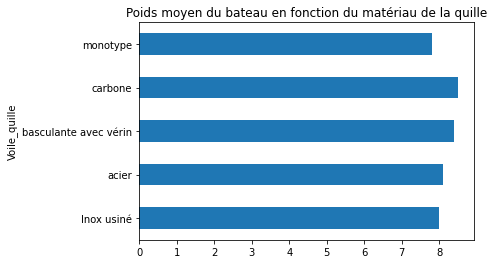

In [14]:
df_mean_deplacement_tonnes.plot(kind='barh',
                  title='Poids moyen du bateau en fonction du matériau de la quille');

In [15]:
# On complète les valeurs manquantes de la colonne "Deplacement_poids_tonnes" par la moyenne de cette dernière

poids_tonnes_acier_mean = df_mean_deplacement_tonnes[1]
poids_tonnes_carbonne_mean = df_mean_deplacement_tonnes[3]

data_cleaned_bis["Deplacement_poids_tonnes"][14] = poids_tonnes_acier_mean
data_cleaned_bis["Deplacement_poids_tonnes"][24] = poids_tonnes_carbonne_mean

data_cleaned_bis

<ipython-input-15-5e99b13eb756>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_bis["Deplacement_poids_tonnes"][14] = poids_tonnes_acier_mean
<ipython-input-15-5e99b13eb756>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_bis["Deplacement_poids_tonnes"][24] = poids_tonnes_carbonne_mean


Nom Bateau,Skipper,Numero_voile,Anciens_noms_bateau,Architecte,Chantier,Date_lancement,Longueur_m,Largeur_m,Tirant_eau_m,Deplacement_poids_tonnes,Nombre_derives,Hauteur_mat_m,Voile_quille,Surface_voiles_au_pres_m2,Surface_voiles_au_portant_m2
NEWREST - ART & FENÊTRES,fabrice amedeo,FRA 56,"No Way Back, Vento di Sardegna",VPLP/Verdier,Persico Marine,2015-08-01,18.28,5.85,4.5,7.0,foils,29.0,monotype,320.0,570.0
PURE - Best Western®,romain attanasio,FRA 49,"Gitana Eighty, Synerciel, Newrest-Matmut",Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),2007-03-08,18.28,5.80,4.5,9.0,2,28.0,acier,280.0,560.0
TSE - 4MYPLANET,alexia barrier,FRA72,"Famille Mary-Etamine du Lys, Initiatives Coeur...",Marc Lombard,MAG France,1998-03-01,18.28,5.54,4.5,9.0,2,29.0,acier,260.0,580.0
Maître CoQ IV,yannick bestaven,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,2015-03-12,18.28,5.80,4.5,8.0,foils,29.0,acier,310.0,550.0
CHARAL,jeremie beyou,08,NaN,VPLP,CDK Technologies,2018-08-18,18.28,5.85,4.5,8.0,foils,29.0,acier,320.0,600.0
LA MIE CÂLINE - ARTISANS ARTIPÔLE,arnaud boissieres,FRA 14,"Ecover3, Président, Gamesa, Kilcullen Voyager-...",Owen Clarke Design LLP - Clay Oliver,Hakes Marine - Mer Agitée,2007-08-03,18.28,5.65,4.5,7.9,foils,29.0,basculante avec vérin,300.0,610.0
BUREAU VALLEE 2,louis burton,18,Banque Populaire VIII,Verdier - VPLP,CDK Technologies,2015-06-09,18.28,5.80,4.5,7.6,foils,28.0,acier,300.0,600.0
ONE PLANET ONE OCEAN,didac costa,ESP 33,Kingfisher - Educacion sin Fronteras - Forum M...,Owen Clarke Design,Martens Yachts,2000-02-02,18.28,5.30,4.5,8.9,2,26.0,acier,240.0,470.0
GROUPE SÉTIN,manuel cousin,FRA 71,"Paprec-Virbac2, Estrella Damm, We are Water, L...",Bruce Farr Yacht Design,Southern Ocean Marine (Nouvelle-Zélande),2007-02-02,18.28,5.80,4.5,9.0,2 asymétriques,28.5,basculante avec vérin,270.0,560.0
BANQUE POPULAIRE X,clarisse cremer,FRA30,Macif - SMA,Verdier - VPLP,CDK - Mer Agitée,2011-03-01,18.28,5.70,4.5,7.7,2,29.0,acier,340.0,570.0


#### Traitement de la colonne "Foil"

L'idée est d'éavaluer l'influence du foils sur la vitesse moyenne "VMG" du bâteau. Pour ce faire, il convient de transformer la colonne **"Nombre_derives"** en une colonne binaire

- 1 => Présence du foils
- 2 => Non présence du foils

In [16]:
print(data_cleaned_bis['Nombre_derives'][1])
print(len(data_cleaned_bis))

for i in range(len(data_cleaned_bis)):
    if data_cleaned_bis['Nombre_derives'][i] == "foils":
        data_cleaned_bis['Nombre_derives'][i] = int(1)
    else:
        data_cleaned_bis['Nombre_derives'][i] = int(0)

data_cleaned_bis = data_cleaned_bis.rename({"Nombre_derives": "Presence_foils",
                                                 }, axis='columns')

data_cleaned_bis

2
33


<ipython-input-16-b8d26d214664>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_bis['Nombre_derives'][i] = int(1)
<ipython-input-16-b8d26d214664>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_bis['Nombre_derives'][i] = int(0)


Nom Bateau,Skipper,Numero_voile,Anciens_noms_bateau,Architecte,Chantier,Date_lancement,Longueur_m,Largeur_m,Tirant_eau_m,Deplacement_poids_tonnes,Presence_foils,Hauteur_mat_m,Voile_quille,Surface_voiles_au_pres_m2,Surface_voiles_au_portant_m2
NEWREST - ART & FENÊTRES,fabrice amedeo,FRA 56,"No Way Back, Vento di Sardegna",VPLP/Verdier,Persico Marine,2015-08-01,18.28,5.85,4.5,7.0,1,29.0,monotype,320.0,570.0
PURE - Best Western®,romain attanasio,FRA 49,"Gitana Eighty, Synerciel, Newrest-Matmut",Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),2007-03-08,18.28,5.80,4.5,9.0,0,28.0,acier,280.0,560.0
TSE - 4MYPLANET,alexia barrier,FRA72,"Famille Mary-Etamine du Lys, Initiatives Coeur...",Marc Lombard,MAG France,1998-03-01,18.28,5.54,4.5,9.0,0,29.0,acier,260.0,580.0
Maître CoQ IV,yannick bestaven,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,2015-03-12,18.28,5.80,4.5,8.0,1,29.0,acier,310.0,550.0
CHARAL,jeremie beyou,08,NaN,VPLP,CDK Technologies,2018-08-18,18.28,5.85,4.5,8.0,1,29.0,acier,320.0,600.0
LA MIE CÂLINE - ARTISANS ARTIPÔLE,arnaud boissieres,FRA 14,"Ecover3, Président, Gamesa, Kilcullen Voyager-...",Owen Clarke Design LLP - Clay Oliver,Hakes Marine - Mer Agitée,2007-08-03,18.28,5.65,4.5,7.9,1,29.0,basculante avec vérin,300.0,610.0
BUREAU VALLEE 2,louis burton,18,Banque Populaire VIII,Verdier - VPLP,CDK Technologies,2015-06-09,18.28,5.80,4.5,7.6,1,28.0,acier,300.0,600.0
ONE PLANET ONE OCEAN,didac costa,ESP 33,Kingfisher - Educacion sin Fronteras - Forum M...,Owen Clarke Design,Martens Yachts,2000-02-02,18.28,5.30,4.5,8.9,0,26.0,acier,240.0,470.0
GROUPE SÉTIN,manuel cousin,FRA 71,"Paprec-Virbac2, Estrella Damm, We are Water, L...",Bruce Farr Yacht Design,Southern Ocean Marine (Nouvelle-Zélande),2007-02-02,18.28,5.80,4.5,9.0,0,28.5,basculante avec vérin,270.0,560.0
BANQUE POPULAIRE X,clarisse cremer,FRA30,Macif - SMA,Verdier - VPLP,CDK - Mer Agitée,2011-03-01,18.28,5.70,4.5,7.7,0,29.0,acier,340.0,570.0


#### Traitement de la colonne **"Numero_voile"**

On extrait le numéro du bâteau grâce à une Regex
On extrait la nationnalité du bâteau grâce à une Regex

On fait correspondre le Numéro_voile du dataframe avec le Numere voile du dataframe "Classement" pour une eventuelle jointure

In [17]:
# Fonction qui extrait les chiffres contenu dans une chaine de caractères
def extract_numbers(text):
    num = " ".join(re.findall(r"\d+", text))
    return num
    
# Fonction qui extrait les caractères alphanumérique uniquement contenu dans une chaine de caractères
def extract_characters(text):
    sentence = " ".join(re.findall("[a-zA-Z]+", text))
    return sentence

In [18]:
data_cleaned_bis['Nationnalite'] = data_cleaned_bis['Numero_voile'].apply(lambda x : extract_characters(x))
data_cleaned_bis['Numero_voile'] = data_cleaned_bis['Numero_voile'].apply(lambda x : extract_numbers(x))
data_cleaned_bis

Nom Bateau,Skipper,Numero_voile,Anciens_noms_bateau,Architecte,Chantier,Date_lancement,Longueur_m,Largeur_m,Tirant_eau_m,Deplacement_poids_tonnes,Presence_foils,Hauteur_mat_m,Voile_quille,Surface_voiles_au_pres_m2,Surface_voiles_au_portant_m2,Nationnalite
NEWREST - ART & FENÊTRES,fabrice amedeo,56,"No Way Back, Vento di Sardegna",VPLP/Verdier,Persico Marine,2015-08-01,18.28,5.85,4.5,7.0,1,29.0,monotype,320.0,570.0,FRA
PURE - Best Western®,romain attanasio,49,"Gitana Eighty, Synerciel, Newrest-Matmut",Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),2007-03-08,18.28,5.80,4.5,9.0,0,28.0,acier,280.0,560.0,FRA
TSE - 4MYPLANET,alexia barrier,72,"Famille Mary-Etamine du Lys, Initiatives Coeur...",Marc Lombard,MAG France,1998-03-01,18.28,5.54,4.5,9.0,0,29.0,acier,260.0,580.0,FRA
Maître CoQ IV,yannick bestaven,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,2015-03-12,18.28,5.80,4.5,8.0,1,29.0,acier,310.0,550.0,
CHARAL,jeremie beyou,08,NaN,VPLP,CDK Technologies,2018-08-18,18.28,5.85,4.5,8.0,1,29.0,acier,320.0,600.0,
LA MIE CÂLINE - ARTISANS ARTIPÔLE,arnaud boissieres,14,"Ecover3, Président, Gamesa, Kilcullen Voyager-...",Owen Clarke Design LLP - Clay Oliver,Hakes Marine - Mer Agitée,2007-08-03,18.28,5.65,4.5,7.9,1,29.0,basculante avec vérin,300.0,610.0,FRA
BUREAU VALLEE 2,louis burton,18,Banque Populaire VIII,Verdier - VPLP,CDK Technologies,2015-06-09,18.28,5.80,4.5,7.6,1,28.0,acier,300.0,600.0,
ONE PLANET ONE OCEAN,didac costa,33,Kingfisher - Educacion sin Fronteras - Forum M...,Owen Clarke Design,Martens Yachts,2000-02-02,18.28,5.30,4.5,8.9,0,26.0,acier,240.0,470.0,ESP
GROUPE SÉTIN,manuel cousin,71,"Paprec-Virbac2, Estrella Damm, We are Water, L...",Bruce Farr Yacht Design,Southern Ocean Marine (Nouvelle-Zélande),2007-02-02,18.28,5.80,4.5,9.0,0,28.5,basculante avec vérin,270.0,560.0,FRA
BANQUE POPULAIRE X,clarisse cremer,30,Macif - SMA,Verdier - VPLP,CDK - Mer Agitée,2011-03-01,18.28,5.70,4.5,7.7,0,29.0,acier,340.0,570.0,FRA


#### Traitement de la colonne "Numero_voile"

On s'aperçoit que les numéros de voiles ne correspondent pas au numéro des voiles utilisés dans le dataset classement du vendée globe. Nous pensons que cela est surement dû à une erreur de saisie de la part des webmasters du site du Vendée Globle 

On modifie donc ces valeurs pour les faire correspondre avec le numéro des voiles de ce dataframe a celui du dataframe classement.

In [19]:
# On visulise toutes les numéros des voiles pour observer celle qui ne correspondent pas au dataframe classement
print(data_cleaned_bis['Numero_voile'].value_counts())

56      1
16      1
2       1
99      1
53      1
4       1
11      1
1000    1
59      1
07      1
34      1
50      1
92      1
001     1
27      1
222     1
77      1
49      1
83      1
85      1
09      1
69      1
109     1
79      1
30      1
71      1
33      1
18      1
14      1
08      1
17      1
72      1
6       1
Name: Numero_voile, dtype: int64


In [20]:
# Certains numéro de voile ne correspondent pas à ceux du dataframe classement.

data_cleaned_bis['Numero_voile'] = data_cleaned_bis['Numero_voile'].apply(lambda x : x.replace("08", "8").replace("77", "777").replace("16", "10").replace("001", "01").replace("07", "7"))

data_cleaned_bis['Numero_voile'][-2] = data_cleaned_bis['Numero_voile'][-2].replace("2", "02")
data_cleaned_bis

<ipython-input-20-bc2427c8372c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_bis['Numero_voile'][-2] = data_cleaned_bis['Numero_voile'][-2].replace("2", "02")


Nom Bateau,Skipper,Numero_voile,Anciens_noms_bateau,Architecte,Chantier,Date_lancement,Longueur_m,Largeur_m,Tirant_eau_m,Deplacement_poids_tonnes,Presence_foils,Hauteur_mat_m,Voile_quille,Surface_voiles_au_pres_m2,Surface_voiles_au_portant_m2,Nationnalite
NEWREST - ART & FENÊTRES,fabrice amedeo,56,"No Way Back, Vento di Sardegna",VPLP/Verdier,Persico Marine,2015-08-01,18.28,5.85,4.5,7.0,1,29.0,monotype,320.0,570.0,FRA
PURE - Best Western®,romain attanasio,49,"Gitana Eighty, Synerciel, Newrest-Matmut",Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),2007-03-08,18.28,5.80,4.5,9.0,0,28.0,acier,280.0,560.0,FRA
TSE - 4MYPLANET,alexia barrier,72,"Famille Mary-Etamine du Lys, Initiatives Coeur...",Marc Lombard,MAG France,1998-03-01,18.28,5.54,4.5,9.0,0,29.0,acier,260.0,580.0,FRA
Maître CoQ IV,yannick bestaven,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,2015-03-12,18.28,5.80,4.5,8.0,1,29.0,acier,310.0,550.0,
CHARAL,jeremie beyou,8,NaN,VPLP,CDK Technologies,2018-08-18,18.28,5.85,4.5,8.0,1,29.0,acier,320.0,600.0,
LA MIE CÂLINE - ARTISANS ARTIPÔLE,arnaud boissieres,14,"Ecover3, Président, Gamesa, Kilcullen Voyager-...",Owen Clarke Design LLP - Clay Oliver,Hakes Marine - Mer Agitée,2007-08-03,18.28,5.65,4.5,7.9,1,29.0,basculante avec vérin,300.0,610.0,FRA
BUREAU VALLEE 2,louis burton,18,Banque Populaire VIII,Verdier - VPLP,CDK Technologies,2015-06-09,18.28,5.80,4.5,7.6,1,28.0,acier,300.0,600.0,
ONE PLANET ONE OCEAN,didac costa,33,Kingfisher - Educacion sin Fronteras - Forum M...,Owen Clarke Design,Martens Yachts,2000-02-02,18.28,5.30,4.5,8.9,0,26.0,acier,240.0,470.0,ESP
GROUPE SÉTIN,manuel cousin,71,"Paprec-Virbac2, Estrella Damm, We are Water, L...",Bruce Farr Yacht Design,Southern Ocean Marine (Nouvelle-Zélande),2007-02-02,18.28,5.80,4.5,9.0,0,28.5,basculante avec vérin,270.0,560.0,FRA
BANQUE POPULAIRE X,clarisse cremer,30,Macif - SMA,Verdier - VPLP,CDK - Mer Agitée,2011-03-01,18.28,5.70,4.5,7.7,0,29.0,acier,340.0,570.0,FRA


#### Traitement de la colonne **"Nationnalite"**

Pour compléter les colonnes vides restantes, on s'aide du dataframe de classement qui contient la nationnalité de chaque bâteau

In [21]:
data_cleaned_bis['Nationnalite'][3] = "FRA"
data_cleaned_bis['Nationnalite'][4] = "FRA"
data_cleaned_bis['Nationnalite'][6] = "FRA"
data_cleaned_bis['Nationnalite'][12] = "FRA"
data_cleaned_bis['Nationnalite'][17] = "MON"
data_cleaned_bis['Nationnalite'][20] = "FRA"
data_cleaned_bis['Nationnalite'][28] = "FRA"
data_cleaned_bis['Nationnalite'][-2] = "FRA"
data_cleaned_bis

<ipython-input-21-bfb498c1ad53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_bis['Nationnalite'][3] = "FRA"
<ipython-input-21-bfb498c1ad53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_bis['Nationnalite'][4] = "FRA"
<ipython-input-21-bfb498c1ad53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_bis['Nationnalite'][6] = "FRA"
<ipython-input-21-bfb498c1ad53>:4: SettingWithCopyWarning: 
A va

Nom Bateau,Skipper,Numero_voile,Anciens_noms_bateau,Architecte,Chantier,Date_lancement,Longueur_m,Largeur_m,Tirant_eau_m,Deplacement_poids_tonnes,Presence_foils,Hauteur_mat_m,Voile_quille,Surface_voiles_au_pres_m2,Surface_voiles_au_portant_m2,Nationnalite
NEWREST - ART & FENÊTRES,fabrice amedeo,56,"No Way Back, Vento di Sardegna",VPLP/Verdier,Persico Marine,2015-08-01,18.28,5.85,4.5,7.0,1,29.0,monotype,320.0,570.0,FRA
PURE - Best Western®,romain attanasio,49,"Gitana Eighty, Synerciel, Newrest-Matmut",Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),2007-03-08,18.28,5.80,4.5,9.0,0,28.0,acier,280.0,560.0,FRA
TSE - 4MYPLANET,alexia barrier,72,"Famille Mary-Etamine du Lys, Initiatives Coeur...",Marc Lombard,MAG France,1998-03-01,18.28,5.54,4.5,9.0,0,29.0,acier,260.0,580.0,FRA
Maître CoQ IV,yannick bestaven,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,2015-03-12,18.28,5.80,4.5,8.0,1,29.0,acier,310.0,550.0,FRA
CHARAL,jeremie beyou,8,NaN,VPLP,CDK Technologies,2018-08-18,18.28,5.85,4.5,8.0,1,29.0,acier,320.0,600.0,FRA
LA MIE CÂLINE - ARTISANS ARTIPÔLE,arnaud boissieres,14,"Ecover3, Président, Gamesa, Kilcullen Voyager-...",Owen Clarke Design LLP - Clay Oliver,Hakes Marine - Mer Agitée,2007-08-03,18.28,5.65,4.5,7.9,1,29.0,basculante avec vérin,300.0,610.0,FRA
BUREAU VALLEE 2,louis burton,18,Banque Populaire VIII,Verdier - VPLP,CDK Technologies,2015-06-09,18.28,5.80,4.5,7.6,1,28.0,acier,300.0,600.0,FRA
ONE PLANET ONE OCEAN,didac costa,33,Kingfisher - Educacion sin Fronteras - Forum M...,Owen Clarke Design,Martens Yachts,2000-02-02,18.28,5.30,4.5,8.9,0,26.0,acier,240.0,470.0,ESP
GROUPE SÉTIN,manuel cousin,71,"Paprec-Virbac2, Estrella Damm, We are Water, L...",Bruce Farr Yacht Design,Southern Ocean Marine (Nouvelle-Zélande),2007-02-02,18.28,5.80,4.5,9.0,0,28.5,basculante avec vérin,270.0,560.0,FRA
BANQUE POPULAIRE X,clarisse cremer,30,Macif - SMA,Verdier - VPLP,CDK - Mer Agitée,2011-03-01,18.28,5.70,4.5,7.7,0,29.0,acier,340.0,570.0,FRA


#### Traitement de la colonne "Anciens_noms_bateau"

Il reste encore des valeurs manquantes dans la colonne **"Anciens_noms_bateau"**. Pour remplir ces dernières cela nécéssite l'intervention d'un expert métier dans le domaine du Vendée Globe. Toutefois dans le cadre de cette étude cette colonne est inutile elle n'apporte que peu d'information. Il convient donc de retirer cette colonne de notre DataFrame

In [22]:
data_cleaned_bis.drop("Anciens_noms_bateau", axis=1, inplace=True)
data_cleaned_bis

Nom Bateau,Skipper,Numero_voile,Architecte,Chantier,Date_lancement,Longueur_m,Largeur_m,Tirant_eau_m,Deplacement_poids_tonnes,Presence_foils,Hauteur_mat_m,Voile_quille,Surface_voiles_au_pres_m2,Surface_voiles_au_portant_m2,Nationnalite
NEWREST - ART & FENÊTRES,fabrice amedeo,56,VPLP/Verdier,Persico Marine,2015-08-01,18.28,5.85,4.5,7.0,1,29.0,monotype,320.0,570.0,FRA
PURE - Best Western®,romain attanasio,49,Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),2007-03-08,18.28,5.80,4.5,9.0,0,28.0,acier,280.0,560.0,FRA
TSE - 4MYPLANET,alexia barrier,72,Marc Lombard,MAG France,1998-03-01,18.28,5.54,4.5,9.0,0,29.0,acier,260.0,580.0,FRA
Maître CoQ IV,yannick bestaven,17,Verdier - VPLP,CDK Technologies,2015-03-12,18.28,5.80,4.5,8.0,1,29.0,acier,310.0,550.0,FRA
CHARAL,jeremie beyou,8,VPLP,CDK Technologies,2018-08-18,18.28,5.85,4.5,8.0,1,29.0,acier,320.0,600.0,FRA
LA MIE CÂLINE - ARTISANS ARTIPÔLE,arnaud boissieres,14,Owen Clarke Design LLP - Clay Oliver,Hakes Marine - Mer Agitée,2007-08-03,18.28,5.65,4.5,7.9,1,29.0,basculante avec vérin,300.0,610.0,FRA
BUREAU VALLEE 2,louis burton,18,Verdier - VPLP,CDK Technologies,2015-06-09,18.28,5.80,4.5,7.6,1,28.0,acier,300.0,600.0,FRA
ONE PLANET ONE OCEAN,didac costa,33,Owen Clarke Design,Martens Yachts,2000-02-02,18.28,5.30,4.5,8.9,0,26.0,acier,240.0,470.0,ESP
GROUPE SÉTIN,manuel cousin,71,Bruce Farr Yacht Design,Southern Ocean Marine (Nouvelle-Zélande),2007-02-02,18.28,5.80,4.5,9.0,0,28.5,basculante avec vérin,270.0,560.0,FRA
BANQUE POPULAIRE X,clarisse cremer,30,Verdier - VPLP,CDK - Mer Agitée,2011-03-01,18.28,5.70,4.5,7.7,0,29.0,acier,340.0,570.0,FRA


#### On renome le skipper "sam davies" par "samantha davies" car ce skippe porte un nom différent entre les fichiers excel les données des caractéristiques des bâteaux

In [23]:
data_cleaned_bis.loc[data_cleaned_bis.Skipper == 'sam davies', 'Skipper'] = 'samantha davies'
data_cleaned_bis

Nom Bateau,Skipper,Numero_voile,Architecte,Chantier,Date_lancement,Longueur_m,Largeur_m,Tirant_eau_m,Deplacement_poids_tonnes,Presence_foils,Hauteur_mat_m,Voile_quille,Surface_voiles_au_pres_m2,Surface_voiles_au_portant_m2,Nationnalite
NEWREST - ART & FENÊTRES,fabrice amedeo,56,VPLP/Verdier,Persico Marine,2015-08-01,18.28,5.85,4.5,7.0,1,29.0,monotype,320.0,570.0,FRA
PURE - Best Western®,romain attanasio,49,Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),2007-03-08,18.28,5.80,4.5,9.0,0,28.0,acier,280.0,560.0,FRA
TSE - 4MYPLANET,alexia barrier,72,Marc Lombard,MAG France,1998-03-01,18.28,5.54,4.5,9.0,0,29.0,acier,260.0,580.0,FRA
Maître CoQ IV,yannick bestaven,17,Verdier - VPLP,CDK Technologies,2015-03-12,18.28,5.80,4.5,8.0,1,29.0,acier,310.0,550.0,FRA
CHARAL,jeremie beyou,8,VPLP,CDK Technologies,2018-08-18,18.28,5.85,4.5,8.0,1,29.0,acier,320.0,600.0,FRA
LA MIE CÂLINE - ARTISANS ARTIPÔLE,arnaud boissieres,14,Owen Clarke Design LLP - Clay Oliver,Hakes Marine - Mer Agitée,2007-08-03,18.28,5.65,4.5,7.9,1,29.0,basculante avec vérin,300.0,610.0,FRA
BUREAU VALLEE 2,louis burton,18,Verdier - VPLP,CDK Technologies,2015-06-09,18.28,5.80,4.5,7.6,1,28.0,acier,300.0,600.0,FRA
ONE PLANET ONE OCEAN,didac costa,33,Owen Clarke Design,Martens Yachts,2000-02-02,18.28,5.30,4.5,8.9,0,26.0,acier,240.0,470.0,ESP
GROUPE SÉTIN,manuel cousin,71,Bruce Farr Yacht Design,Southern Ocean Marine (Nouvelle-Zélande),2007-02-02,18.28,5.80,4.5,9.0,0,28.5,basculante avec vérin,270.0,560.0,FRA
BANQUE POPULAIRE X,clarisse cremer,30,Verdier - VPLP,CDK - Mer Agitée,2011-03-01,18.28,5.70,4.5,7.7,0,29.0,acier,340.0,570.0,FRA


#### On ré-organise l'ordre des colonnes du DataFrame

In [24]:
column_names = ["Numero_voile", "Nationnalite", "Skipper", "Architecte", "Chantier", "Date_lancement", "Longueur_m", "Largeur_m", "Tirant_eau_m", "Deplacement_poids_tonnes", "Presence_foils", "Hauteur_mat_m", "Voile_quille", "Surface_voiles_au_pres_m2", "Surface_voiles_au_portant_m2"]

data_cleaned_bis = data_cleaned_bis.reindex(columns=column_names)

data_cleaned_bis

Nom Bateau,Numero_voile,Nationnalite,Skipper,Architecte,Chantier,Date_lancement,Longueur_m,Largeur_m,Tirant_eau_m,Deplacement_poids_tonnes,Presence_foils,Hauteur_mat_m,Voile_quille,Surface_voiles_au_pres_m2,Surface_voiles_au_portant_m2
NEWREST - ART & FENÊTRES,56,FRA,fabrice amedeo,VPLP/Verdier,Persico Marine,2015-08-01,18.28,5.85,4.5,7.0,1,29.0,monotype,320.0,570.0
PURE - Best Western®,49,FRA,romain attanasio,Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),2007-03-08,18.28,5.80,4.5,9.0,0,28.0,acier,280.0,560.0
TSE - 4MYPLANET,72,FRA,alexia barrier,Marc Lombard,MAG France,1998-03-01,18.28,5.54,4.5,9.0,0,29.0,acier,260.0,580.0
Maître CoQ IV,17,FRA,yannick bestaven,Verdier - VPLP,CDK Technologies,2015-03-12,18.28,5.80,4.5,8.0,1,29.0,acier,310.0,550.0
CHARAL,8,FRA,jeremie beyou,VPLP,CDK Technologies,2018-08-18,18.28,5.85,4.5,8.0,1,29.0,acier,320.0,600.0
LA MIE CÂLINE - ARTISANS ARTIPÔLE,14,FRA,arnaud boissieres,Owen Clarke Design LLP - Clay Oliver,Hakes Marine - Mer Agitée,2007-08-03,18.28,5.65,4.5,7.9,1,29.0,basculante avec vérin,300.0,610.0
BUREAU VALLEE 2,18,FRA,louis burton,Verdier - VPLP,CDK Technologies,2015-06-09,18.28,5.80,4.5,7.6,1,28.0,acier,300.0,600.0
ONE PLANET ONE OCEAN,33,ESP,didac costa,Owen Clarke Design,Martens Yachts,2000-02-02,18.28,5.30,4.5,8.9,0,26.0,acier,240.0,470.0
GROUPE SÉTIN,71,FRA,manuel cousin,Bruce Farr Yacht Design,Southern Ocean Marine (Nouvelle-Zélande),2007-02-02,18.28,5.80,4.5,9.0,0,28.5,basculante avec vérin,270.0,560.0
BANQUE POPULAIRE X,30,FRA,clarisse cremer,Verdier - VPLP,CDK - Mer Agitée,2011-03-01,18.28,5.70,4.5,7.7,0,29.0,acier,340.0,570.0


In [25]:
data_boat_carac = data_cleaned_bis.copy()
data_boat_carac

Nom Bateau,Numero_voile,Nationnalite,Skipper,Architecte,Chantier,Date_lancement,Longueur_m,Largeur_m,Tirant_eau_m,Deplacement_poids_tonnes,Presence_foils,Hauteur_mat_m,Voile_quille,Surface_voiles_au_pres_m2,Surface_voiles_au_portant_m2
NEWREST - ART & FENÊTRES,56,FRA,fabrice amedeo,VPLP/Verdier,Persico Marine,2015-08-01,18.28,5.85,4.5,7.0,1,29.0,monotype,320.0,570.0
PURE - Best Western®,49,FRA,romain attanasio,Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),2007-03-08,18.28,5.80,4.5,9.0,0,28.0,acier,280.0,560.0
TSE - 4MYPLANET,72,FRA,alexia barrier,Marc Lombard,MAG France,1998-03-01,18.28,5.54,4.5,9.0,0,29.0,acier,260.0,580.0
Maître CoQ IV,17,FRA,yannick bestaven,Verdier - VPLP,CDK Technologies,2015-03-12,18.28,5.80,4.5,8.0,1,29.0,acier,310.0,550.0
CHARAL,8,FRA,jeremie beyou,VPLP,CDK Technologies,2018-08-18,18.28,5.85,4.5,8.0,1,29.0,acier,320.0,600.0
LA MIE CÂLINE - ARTISANS ARTIPÔLE,14,FRA,arnaud boissieres,Owen Clarke Design LLP - Clay Oliver,Hakes Marine - Mer Agitée,2007-08-03,18.28,5.65,4.5,7.9,1,29.0,basculante avec vérin,300.0,610.0
BUREAU VALLEE 2,18,FRA,louis burton,Verdier - VPLP,CDK Technologies,2015-06-09,18.28,5.80,4.5,7.6,1,28.0,acier,300.0,600.0
ONE PLANET ONE OCEAN,33,ESP,didac costa,Owen Clarke Design,Martens Yachts,2000-02-02,18.28,5.30,4.5,8.9,0,26.0,acier,240.0,470.0
GROUPE SÉTIN,71,FRA,manuel cousin,Bruce Farr Yacht Design,Southern Ocean Marine (Nouvelle-Zélande),2007-02-02,18.28,5.80,4.5,9.0,0,28.5,basculante avec vérin,270.0,560.0
BANQUE POPULAIRE X,30,FRA,clarisse cremer,Verdier - VPLP,CDK - Mer Agitée,2011-03-01,18.28,5.70,4.5,7.7,0,29.0,acier,340.0,570.0


#### On partage la variable _data_boat_carac_ pour la réutiliser dans le notebook de l'analyse

In [26]:
data_boat_carac_share = data_boat_carac
%store data_boat_carac_share

Stored 'data_boat_carac_share' (DataFrame)
